In [1]:
!pip install kagglehub -q

In [2]:
import kagglehub
import pandas as pd
import os

In [3]:
#  Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset


In [4]:
csv_path = os.path.join(path, "diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df = pd.read_csv(csv_path)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


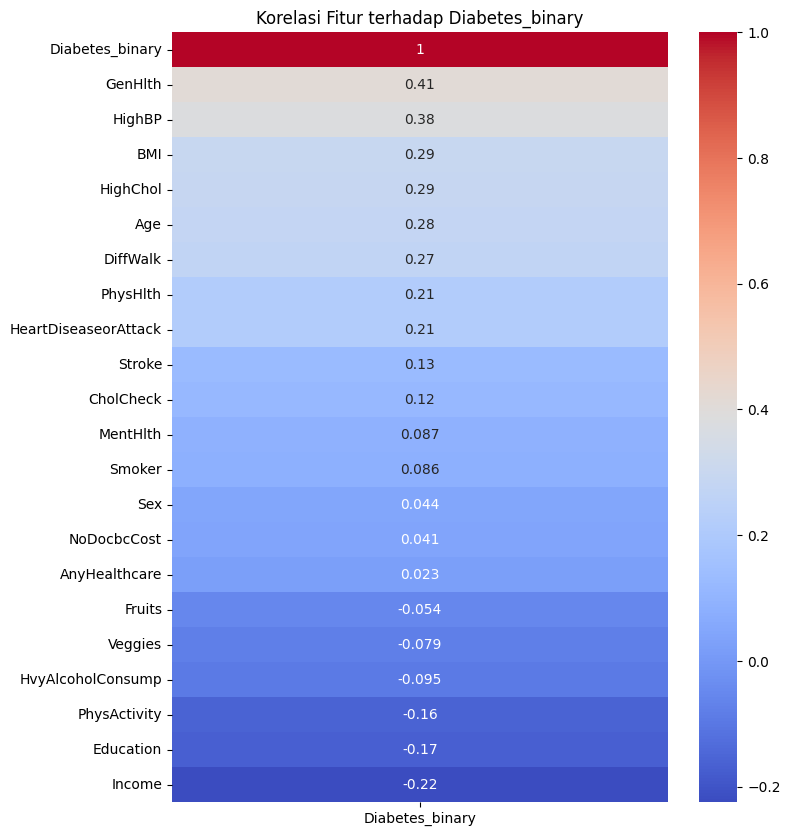

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

cor = df.corr()
cor_target = cor[["Diabetes_binary"]].sort_values(by="Diabetes_binary", ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(cor_target, annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur terhadap Diabetes_binary")
plt.show()

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')


In [7]:
import numpy as np
df_select = df[['Diabetes_binary'] + list(selected_features)].copy()
df_select.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,0.0,26.0,0.0,3.0,30.0,0.0,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,0.0,3.0,0.0,0.0,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,0.0,1.0,10.0,0.0,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,0.0,3.0,3.0,0.0,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,0.0,2.0,0.0,0.0,8.0,5.0,8.0


In [8]:
df_select.duplicated().sum()

np.int64(11754)

In [9]:
df_select = df_select.drop_duplicates()

In [10]:
df_select.duplicated().sum()

np.int64(0)

In [11]:
df_select['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
1.0,32076
0.0,26862


In [12]:
df_select['Diabetes_binary'] = df_select['Diabetes_binary'].astype(int)

<ipython-input-12-8938604e2959>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Diabetes_binary'] = df_select['Diabetes_binary'].astype(int)


In [13]:
df_select.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack',
       'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')

In [14]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58938 entries, 0 to 70691
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       58938 non-null  int64  
 1   HighBP                58938 non-null  float64
 2   HighChol              58938 non-null  float64
 3   BMI                   58938 non-null  float64
 4   HeartDiseaseorAttack  58938 non-null  float64
 5   GenHlth               58938 non-null  float64
 6   PhysHlth              58938 non-null  float64
 7   DiffWalk              58938 non-null  float64
 8   Age                   58938 non-null  float64
 9   Education             58938 non-null  float64
 10  Income                58938 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 5.4 MB


In [15]:
# Fitur target
target = 'Diabetes_binary'

# Kolom biner (0 atau 1)
binary_cols = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'DiffWalk']

# Kolom ordinal (bertingkat, tapi kategorikal)
ordinal_cols = ['GenHlth', 'Age', 'Education', 'Income']

# Kolom numerik kontinu (harus distandarisasi)
numeric_cols = ['BMI', 'PhysHlth']

In [16]:
df_select[ordinal_cols] = df_select[ordinal_cols].astype(int)

<ipython-input-16-2a959b0bc727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select[ordinal_cols] = df_select[ordinal_cols].astype(int)


In [17]:
df_select[binary_cols] = df_select[binary_cols].astype(int)

In [18]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58938 entries, 0 to 70691
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       58938 non-null  int64  
 1   HighBP                58938 non-null  int64  
 2   HighChol              58938 non-null  int64  
 3   BMI                   58938 non-null  float64
 4   HeartDiseaseorAttack  58938 non-null  int64  
 5   GenHlth               58938 non-null  int64  
 6   PhysHlth              58938 non-null  float64
 7   DiffWalk              58938 non-null  int64  
 8   Age                   58938 non-null  int64  
 9   Education             58938 non-null  int64  
 10  Income                58938 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 5.4 MB


In [19]:
df_select.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,1,0,26.0,0,3,30.0,0,4,6,8
1,0,1,1,26.0,0,3,0.0,0,12,6,8
2,0,0,0,26.0,0,1,10.0,0,13,6,8
3,0,1,1,28.0,0,3,3.0,0,11,6,8
4,0,0,0,29.0,0,2,0.0,0,8,5,8


In [20]:
df_select[df_select['Diabetes_binary']==1]

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
35346,1,1,1,30.0,1,5,30.0,1,9,5,1
35347,1,0,0,25.0,0,3,0.0,0,13,6,8
35348,1,1,1,28.0,0,4,0.0,1,11,4,6
35349,1,0,0,23.0,0,2,0.0,0,7,5,6
35350,1,1,0,27.0,0,1,0.0,0,13,5,4
...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,37.0,0,4,0.0,0,6,4,1
70688,1,0,1,29.0,1,2,0.0,1,10,3,6
70689,1,1,1,25.0,1,5,0.0,1,13,6,4
70690,1,1,1,18.0,0,4,0.0,1,11,2,4


### **Data Preprocessing**

In [21]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_select.drop(columns=[target])
y = df_select[target]

# Split data (contoh: 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform hanya kolom numerik di train, lalu transform test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [23]:
X_train_scaled.head()

,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
54958,1,1,0.489671,1,3,-0.458164,0,6,6,8
69583,1,1,1.435004,0,3,-0.646885,1,11,6,6
48845,1,1,1.164909,0,4,0.768523,1,11,4,4
34212,1,0,-1.265946,0,1,-0.646885,0,13,5,3
19037,0,0,0.894814,0,2,0.674162,0,4,4,6


In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(256, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(
    optimizer='adamw',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,617 (186.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

In [27]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/50
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6609 - loss: 1.0740 - val_accuracy: 0.7134 - val_loss: 0.7142 - learning_rate: 0.0010
Epoch 2/50
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7074 - loss: 0.6982 - val_accuracy: 0.7127 - val_loss: 0.6334 - learning_rate: 0.0010
Epoch 3/50
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7114 - loss: 0.6241 - val_accuracy: 0.7139 - val_loss: 0.5939 - learning_rate: 0.0010
Epoch 4/50
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7178 - loss: 0.5960 - val_accuracy: 0.6483 - val_loss: 0.6467 - learning_rate: 0.0010
Epoch 5/50
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7165 - loss: 0.5905 - val_accuracy: 0.7111 - val_loss: 0.5802 - learning_rate: 0.0010
Epoch 6/50
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7155 - loss: 0.5789 - val_accuracy: 0.7167 - val_loss: 0.5683 - learning_rate: 0.0010
Epoch 7/50
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7193 

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


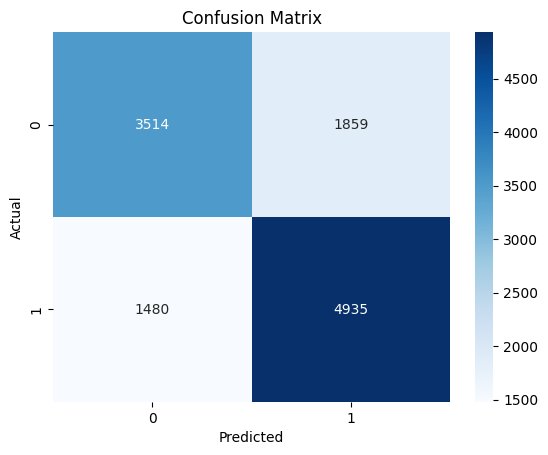

              precision    recall  f1-score   support

           0     0.7036    0.6540    0.6779      5373
           1     0.7264    0.7693    0.7472      6415

    accuracy                         0.7167     11788
   macro avg     0.7150    0.7117    0.7126     11788
weighted avg     0.7160    0.7167    0.7156     11788



In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ambil prediksi probabilitas dari model
y_pred_prob = model.predict(X_test)

# Karena ini binary classification dengan sigmoid, ubah ke kelas 0 atau 1
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, digits=4))

## SHAP

In [42]:
import shap

def shap_explain_patient(model, X_reference, X_patient, feature_names):

    X_ref_np = X_reference.to_numpy() if isinstance(X_reference, pd.DataFrame) else X_reference
    X_pat_np = X_patient.to_numpy() if isinstance(X_patient, pd.DataFrame) else X_patient

    def model_predict(x):
        return model.predict(x).flatten()

    # Ambil background 100 sampel acak
    background = X_ref_np[np.random.choice(X_ref_np.shape[0], 100, replace=False)]

    explainer = shap.KernelExplainer(model_predict, background)
    shap_values = explainer.shap_values(X_pat_np, nsamples=100)

    shap.force_plot(
        explainer.expected_value,
        shap_values[0],
        X_patient.iloc[0] if isinstance(X_patient, pd.DataFrame) else X_pat_np[0],
        feature_names=feature_names,
        matplotlib=True
    )

## Inference

In [44]:
import numpy as np

def predict_diabetes_risk(model, X_input):
    """
    Model menghasilkan risiko diabetes dalam persen dan
    kalimat penjelasan mudah dimengerti.

    Parameters:
    - model: model Keras yang sudah dilatih
    - X_input: input data 2D numpy array, shape=(n_samples, n_features)

    Returns:
    - List kalimat prediksi risiko per sample
    """
    # Prediksi probabilitas (nilai antara 0 dan 1)
    prob = model.predict(X_input).flatten()

    results = []
    for p in prob:
        risk_pct = p * 100
        results.append(
            f"Risiko terkena diabetes diperkirakan sekitar {risk_pct:.1f}%. "
        )
    return results

In [56]:
# Misal X_new sudah siap dan sesuai preprocessing
X_new = np.array([
    [1,	0,	26.0,	0,	3,	30.0,	0,	4,	6,	8],  # ganti ... dengan data nyata
])

predictions = predict_diabetes_risk(model, X_new)
for i, pred in enumerate(predictions):
    print(f"Pasien {i+1}: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Pasien 1: Risiko terkena diabetes diperkirakan sekitar 20.1%. 


In [57]:
import pandas as pd

feature_names = ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']

# Background DataFrame: 100 sampel dari X_train
X_background_df = pd.DataFrame(X_train[:100], columns=feature_names)

# Data user baru sebagai DataFrame
X_new_df = pd.DataFrame(X_new, columns=feature_names)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


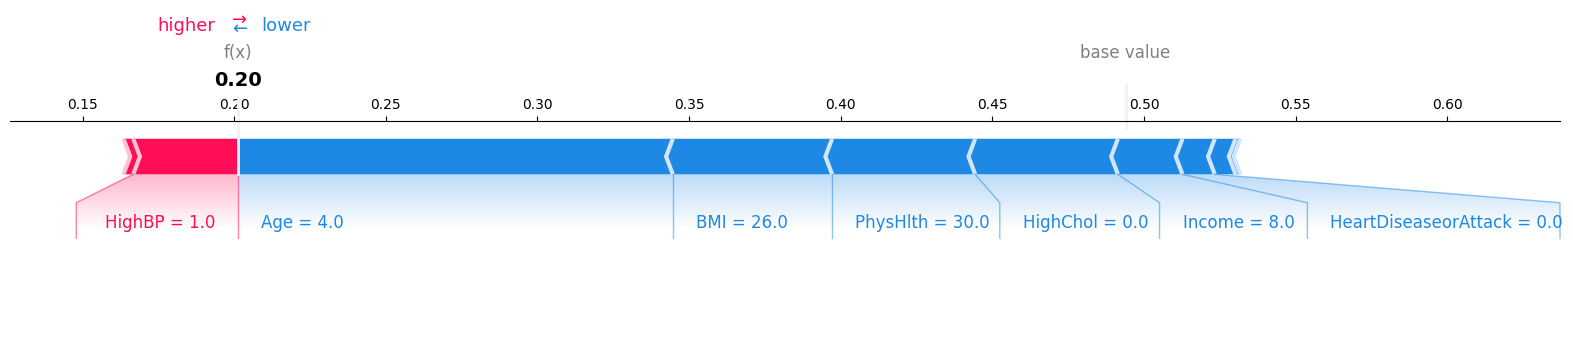

In [58]:
shap_explain_patient(model, X_background_df, X_new_df, feature_names)

## Unduh

In [ ]:
model.save("model_diabetes.h5")

In [ ]:
# !pip install tensorflowjs -q
# !tensorflowjs_converter --input_format=keras model_diabetes.h5 ./tfjs_model/

In [ ]:
!zip -r tfjs_model.zip tfjs_model/